# Data Driven Modeling
### (Theme of this semester: CODING AS LITERACY)
<hr style="height:3px;border:none;color:stillblue;background-color:black;" />
### PhD seminar series at Chair for Computer Aided Architectural Design (CAAD), ETH Zurich


[Vahid Moosavi](https://vahidmoosavi.com/)
<hr style="height:1px;border:none;color:stillblue;background-color:black;" />

<a></a>

# 18th Session 
<hr style="height:1px;border:none;color:stillblue;background-color:steelblue;" />
<span style="color:steelblue;font-size: 1em;">09 May 2017</span>


# Reinforcement Learning (Learning by Interaction)
### To be discussed
* **Supervised, Unsupervised and Reinforcement Learning**
* ** Main Problem of RL**
* **Markov Decision Process (MDP)**
* **Main approaches and architectures**
* ****


In [1]:
import warnings
warnings.filterwarnings("ignore")
import datetime
import pandas as pd
# import pandas.io.data
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import sys
import sompylib.sompy as SOM# from pandas import Series, DataFrame

from ipywidgets import interact, HTML, FloatSlider
import tensorflow as tf
%matplotlib inline

# Three main classes of Machine Learning Problems
- **Supervised Learning**
    - Target based and no direct effect on the environment
- ** Unsupervised Learning**
    - No Target to predict and more on exploring the state space and learning the topology
- ** Reinforcement Learning**
    - Learning to how to act where our actions change the state of the environment
<hr style="height:3px;border:none;color:stillblue;background-color:black;" />

- [On of the Best Source to start](http://people.inf.elte.hu/lorincz/Files/RL_2006/SuttonBook.pdf)
- **According to Sutton: Reinforcement learning is learning... ** 
    - ... what to do—how to map situations to actions—
    - ... So as to maximize a numerical reward signal. 
    - ... The learner is not told which actions to take, as in most forms of machine learning, but instead must discover which actions yield the most reward by trying them. 
    - ... actions may affect not only the immediate reward but also the next situation and, through that, all subsequent rewards. 
<hr style="height:3px;border:none;color:stillblue;background-color:black;" />
 

# Reinforcement Learning (RL) and Markov Decision Process (MDP)
![](Images/MDP.png)
# Key Terms

- **State Space**
- **Policy function (how to act)**
- **State value (its reward and what to expect later on from this state)**
- **Episodic vs. Continuous games**
<hr style="height:3px;border:none;color:stillblue;background-color:black;" />


# Real World Examples of RL
- Game theory and RL as Dynamic Game Playing
    - Game theoretical problems can be modeled as model based RL problems, usually with known strategies (i.e. policy functions of the players)
- Planning Vs. Learning 
- Dynamic Resource Allocation
    - Banks and economic polocies (e.g. interest rates)
    - Supply chain and Inventory management (e.g. VMI)
    - CPU
    - Cloud computing
    - Manufacturing: Job-Shop Scheduling
    - Smart Home (e.g. how to make home comfortable for its user. Think about this in comparison to classical optimization)
    - Urban Traffic planning: Dynamic tolls, Dynamic light control
- Simulation Based Optimization
    - Water flow modeling in relation to urban design
    - Dynamic pricing
- Multi-Agent Learning 

<hr style="height:3px;border:none;color:stillblue;background-color:black;" />
# Main approaches to RL

## Value Iteration method

### Discounted reward

### we want to know the value of each state, then, we can take a greedy action, which is optimal.
## $$V^\pi(s) = E \{ r_t + \gamma r_{t+1} + \gamma^2 r_{t+2} + \ldots \mid s_t = s \}$$


## $$V^\pi(s) = \sum_{a} \pi(s,a) \sum_{s'} \mathcal{P}_{ss'}^{a} \left[ \mathcal{R}_{ss'}^{a} + \gamma V^\pi(s') \right]$$


# Think about the "Relational" nature of this equation!
#### This equation says, we need to calculate how much reward we expect by moving from the current state to all possible states and then continue the same way from all of them to all the other states in (in)finite manner.  
#### This equation is based on [Bellman_equation](https://en.wikipedia.org/wiki/Bellman_equation), which is the fundation of dynamic programming and optimal control theory. 


## Policy Iteration method
### In the same manner, but when we adpat both values and policy functions sequentially
<hr style="height:3px;border:none;color:stillblue;background-color:black;" />




# One important note related to the learning part of RL:
# Plannign Vs. Learning
## Learning the values is just enough. We don't need to teach the exact movements in a global view! 


# An example: Grid World
### With value iteration
##  [From Sutton](http://people.inf.elte.hu/lorincz/Files/RL_2006/SuttonBook.pdf)
### By the learning the values of each grid cell, we would like to learn to move from anywhere to the final state.

In [36]:
# The agent has four actions (except in the corners)
#Left, Right, Up, Down
def action_LRUD(N):
    Action = np.zeros((N*N,N*N))
    # We have four actions everywhere

    #Top left corner
    i=0
    j=0
    state = i*N + j
    right = state + 1
    # left = state -1
    # up = (i-1)*N + j
    down = (i+1)*N +j
    Action[state,right] = 1/2.
    # Action[state,left] = 1/4.
    # Action[state,up] = 1/4.
    Action[state,down] = 1/2.
    
    #Top right corner
    i=0
    j=N-1
    state = i*N + j
    # right = state + 1
    left = state -1
    # up = (i-1)*N + j
    down = (i+1)*N +j
    # Action[state,right] = 1/4.
    Action[state,left] = 1/2.
    # Action[state,up] = 1/4.
    Action[state,down] = 1/2.
    
    
    #Lower left
    i=N-1
    j=0
    state = i*N + j
    right = state + 1
    # left = state -1
    up = (i-1)*N + j
    # down = (i+1)*N +j
    Action[state,right] = 1/2.
    # Action[state,left] = 1/2.
    Action[state,up] = 1/2.
    # Action[state,down] = 1/2.

    # Lower right
    i=N-1
    j=N-1
    state = i*N + j
    # right = state + 1
    left = state -1
    up = (i-1)*N + j
    # down = (i+1)*N +j
    # Action[state,right] = 1/4.
    Action[state,left] = 1/2.
    Action[state,up] = 1/2.
    # Action[state,down] = 1/2.




    #Top row
    i=0
    for j in range(1,N-1):
        state = i*N + j
        right = state + 1
        left = state -1
        # up = (i-1)*N + j
        down = (i+1)*N +j
        Action[state,right] = 1/3.
        Action[state,left] = 1/3.
        # Action[state,up] = 1/3.
        Action[state,down] = 1/3.

    #Last row
    i=N-1
    for j in range(1,N-1):
        state = i*N + j
        right = state + 1
        left = state -1
        up = (i-1)*N + j
    #     down = (i+1)*N +j
        Action[state,right] = 1/3.
        Action[state,left] = 1/3.
        Action[state,up] = 1/3.
    #     Action[state,down] = 1/3.

    #Left col
    j=0
    for i in range(1,N-1):
        state = i*N + j
        right = state + 1
    #     left = state -1
        up = (i-1)*N + j
        down = (i+1)*N +j
        Action[state,right] = 1/3.
    #     Action[state,left] = 1/3.
        Action[state,up] = 1/3.
        Action[state,down] = 1/3.


    #Right col
    j=N-1
    for i in range(1,N-1):
        state = i*N + j
    #     right = state + 1
        left = state -1
        up = (i-1)*N + j
        down = (i+1)*N +j
    #     Action[state,right] = 1/3.
        Action[state,left] = 1/3.
        Action[state,up] = 1/3.
        Action[state,down] = 1/3.


    for i in range(1,N-1):
        for j in range(1,N-1):
            state = i*N + j
            right = state + 1
            left = state -1
            up = (i-1)*N + j
            down = (i+1)*N +j
            Action[state,right] = 1/4.
            Action[state,left] = 1/4.
            Action[state,up] = 1/4.
            Action[state,down] = 1/4.
    return Action

## Rewards we get in each state

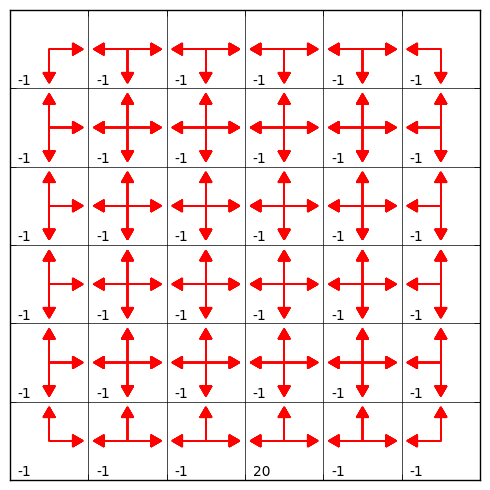

In [37]:
N = 6
Action = action_LRUD(N)

#Reward
#Everywhere negative
state_reward = -1*np.ones((N*N))

#Except the terminating state with positive reward
terminating_state= np.random.randint(0,N)*N +np.random.randint(0,N)
# middle = int(N/2)*N + int(N/2)
state_reward[terminating_state] = +20


fig = plt.figure(figsize=(5,5));
ax = fig.add_subplot(1,1,1)
ax.xaxis.set_ticks([i for i in range(1,N+1)])
ax.yaxis.set_ticks([i for i in range(1,N+1)])
ax.xaxis.set_ticklabels([])
ax.yaxis.set_ticklabels([])
ax.grid(True,linestyle='-', linewidth=.5)
vals = np.around(state_reward.reshape(N,N)).astype(int)
for i in range(0,N,1):
    for j in range(0,N,1):
        ax.annotate(vals[i,j], (i+.1,j+.1),size=10, va="center")
    for i in range(0,N):
        for j in range(0,N):
            state = i*N+j
            valid_actions = Action[state]>0
            next_greedy_state = np.where(valid_actions)[0]
            for d in next_greedy_state:
                i1 = d/N  
                j1 = d%N 
                plt.arrow(i+.5,j+.5,.3*(i1-i),.3*(j1-j),head_width=.15, head_length=.13, fc='r', ec='r');
    plt.tight_layout()

In [59]:
N = 10
Action = action_LRUD(N)

#Reward
#Everywhere negative
state_reward = -1*np.ones((N*N))

#Except the terminating state with positive reward
terminating_state= np.random.randint(0,N)*N +np.random.randint(0,N)
# middle = int(N/2)*N + int(N/2)
state_reward[terminating_state] = +20

# Value Iteration

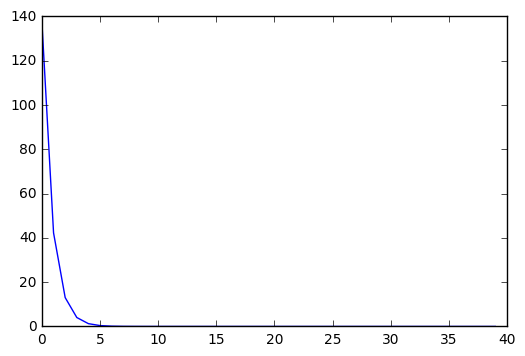

In [60]:
Gamma = .5
# Value Iteration
#initialize State_Value
state_value = np.zeros((N*N))
delta = 0
deltas = []
for i in range(40):
    temp = state_value.copy()
    #Update Values
    for j in range(Action.shape[0]):
        state_value[j] = np.sum(np.multiply(Action[j],state_reward+Gamma*state_value))
    
    diff = np.sum(np.abs(temp-state_value))
    
    delta = np.maximum(delta,diff)
    deltas.append(diff)
plt.plot(deltas);

## Policy will be based on the Greedy Approach (i.e. we chose the action which leads us to the  next state with the maximum state value)

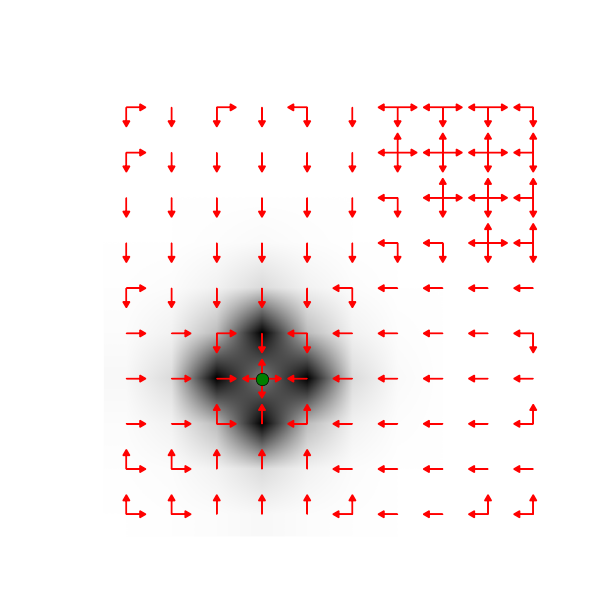

In [61]:

fig = plt.figure(figsize=(7,7));
plt.imshow(state_value.reshape(N,N),cmap=plt.cm.gray_r);
i = terminating_state/N
j = terminating_state%N
plt.plot(j,i,'og',markersize=9)
plt.axis('off')
for i in range(0,N):
    for j in range(0,N):
        state = i*N+j
        valid_actions = Action[state]>0
        action_reward = np.around(np.multiply(Action[state],state_value),decimals=3)
        try:
            max_val = np.max(action_reward[valid_actions])
            next_greedy_state = np.where(action_reward==max_val)[0]
            for d in next_greedy_state:
                i1 = d/N
                j1 = d%N
                plt.arrow(j,i,.3*(j1-j),.3*(i1-i),head_width=.15, head_length=.13, fc='r', ec='r');
        except:
            continue


plt.grid()

## Now Let's play with Gamma  and iteration times (as meta-parameters)
### Larger Gamma means we care more about future steps
### $$V^\pi(s) = E \{ r_t + \gamma r_{t+1} + \gamma^2 r_{t+2} + \ldots \mid s_t = s \}$$

In [62]:
def value_iteration(Itern=50,Gamma=.4):
    # Value Iteration
    #initialize State_Value
    state_value = np.zeros((N*N))
    delta = 0
    deltas = []
    for i in range(Itern):
        temp = state_value.copy()
        #Update Values
        for j in range(Action.shape[0]):
            state_value[j] = np.sum(np.multiply(Action[j],state_reward+Gamma*state_value))
        
        diff = np.sum(np.abs(temp-state_value))
        
        delta = np.maximum(delta,diff)
        deltas.append(diff)
    
    state_value = np.around(state_value,decimals=1)
    fig = plt.figure(figsize=(14,7));
    plt.subplot(1,2,1)
    plt.plot(deltas);
    plt.subplot(1,2,2)
    plt.imshow(state_value.reshape(N,N),cmap=plt.cm.gray_r);
    i = terminating_state/N
    j = terminating_state%N
    plt.plot(j,i,'og',markersize=9)
    plt.axis('off')
    for i in range(0,N):
        for j in range(0,N):
            state = i*N+j
            valid_actions = Action[state]>0
            action_reward = np.around(np.multiply(Action[state],state_value),decimals=2)
            try:
                max_val = np.max(action_reward[valid_actions])
                next_greedy_state = np.where(action_reward==max_val)[0]
                for d in next_greedy_state:
                    i1 = d/N
                    j1 = d%N
                    plt.arrow(j,i,.3*(j1-j),.3*(i1-i),head_width=.15, head_length=.13, fc='r', ec='r');
            except:
                continue
    plt.grid()
    plt.tight_layout()
    
    
    

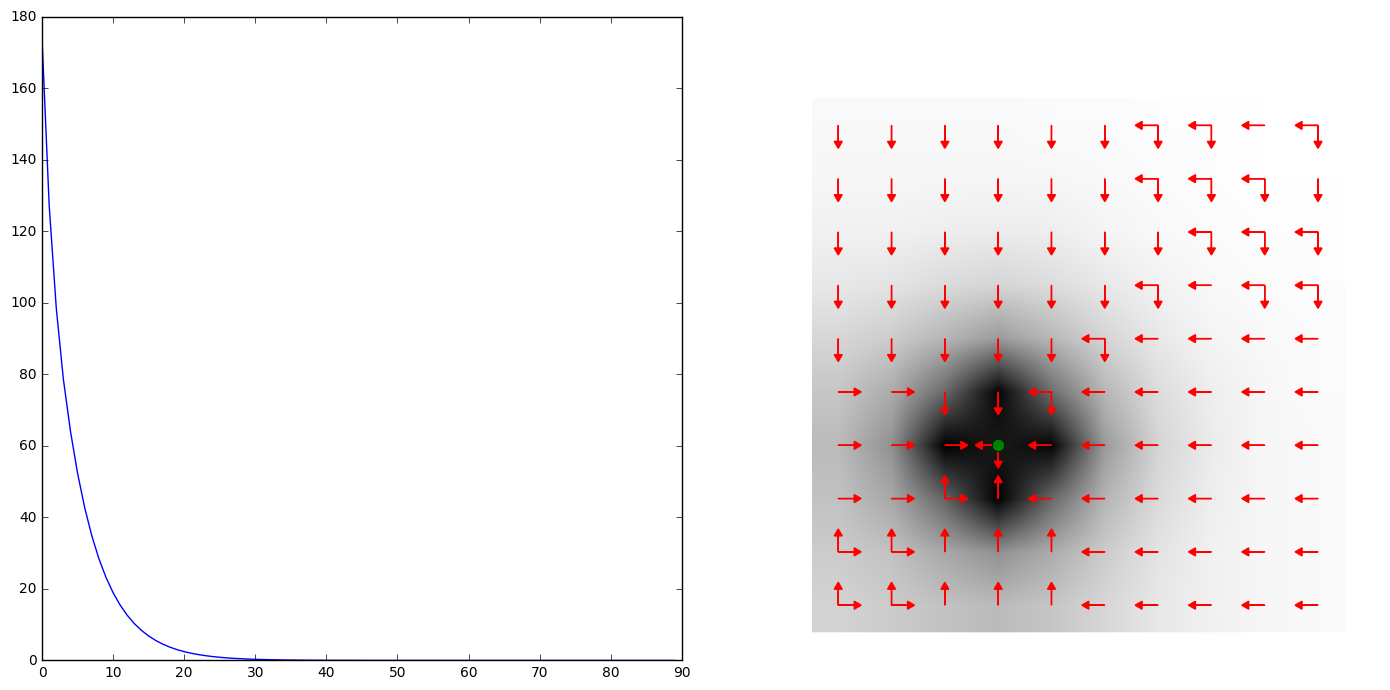

In [63]:
interact(value_iteration,Itern=(20,100,10),Gamma=(.0,1,.05));

## Blocking some cells

In [68]:
N = 10
Action = action_LRUD(N)

#Reward
state_reward = -1*np.ones((N*N))

terminating_state= np.random.randint(0,N)*N +np.random.randint(0,N)
# middle = int(N/2)*N + int(N/2)
state_reward[terminating_state] = +20


blocking_state= np.random.randint(1,N-1)*N +np.random.randint(1,N-1)
Action[blocking_state] = 0
Action[:,blocking_state] = 0
state_reward[blocking_state] = -20

blocking_state= np.random.randint(1,N-1)*N +np.random.randint(1,N-1)
Action[blocking_state] = 0
Action[:,blocking_state] = 0
state_reward[blocking_state] = -20



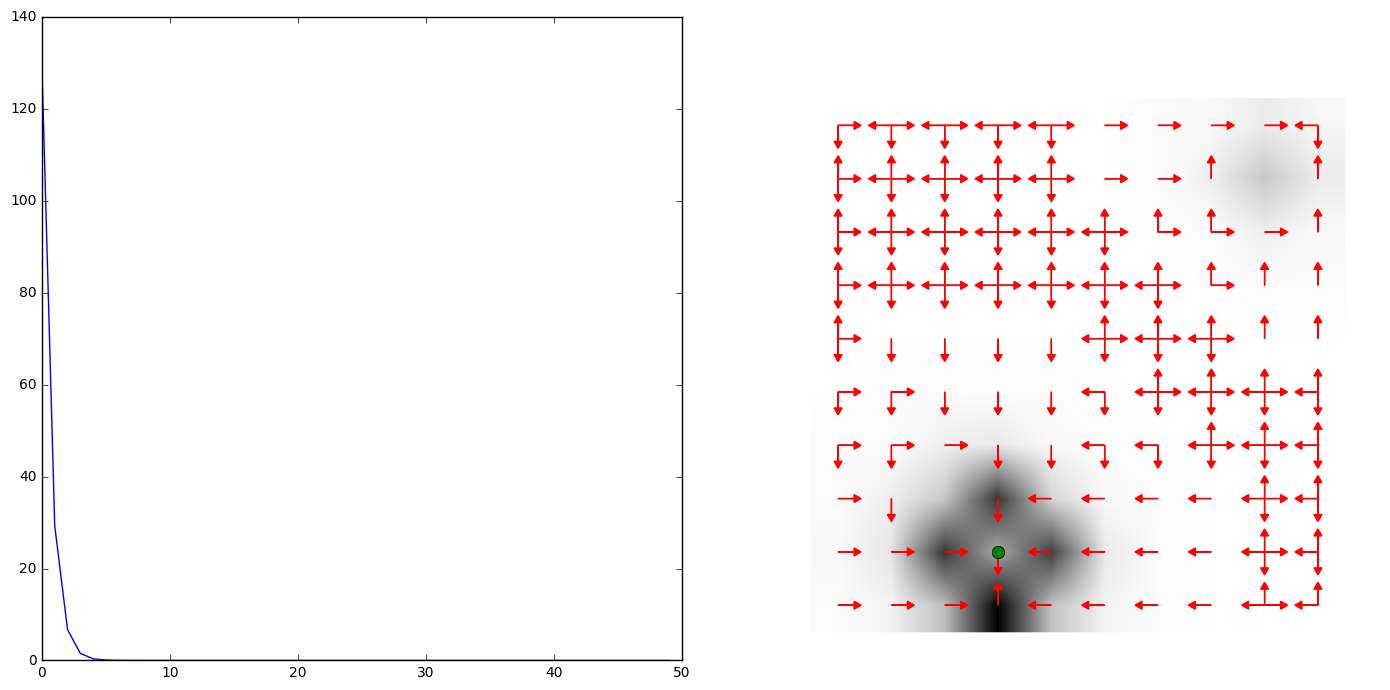

In [69]:
interact(value_iteration,Itern=(20,160,10),Gamma=(.0,1,.05));


## Random Rewards

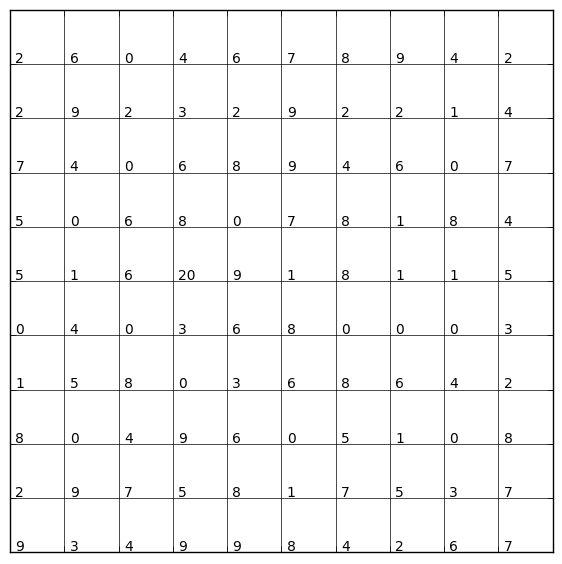

In [45]:
N = 10

Action = action_LRUD(N)

#Reward
state_reward = np.random.randint(0,10,size=N*N)
# state_reward = -1*np.ones((N*N))


terminating_state= np.random.randint(0,N)*N +np.random.randint(0,N)
# middle = int(N/2)*N + int(N/2)
state_reward[terminating_state] = +20

fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111)
ax.xaxis.set_ticks([i for i in range(1,N+1)])
ax.yaxis.set_ticks([i for i in range(1,N+1)])
ax.xaxis.set_ticklabels([])
ax.yaxis.set_ticklabels([])
ax.grid(True,linestyle='-', linewidth=.5)
vals = np.around(state_reward.reshape(N,N)).astype(int)
for i in range(0,N,1):
    for j in range(0,N,1):
        ax.annotate(vals[i,j], (i+.1,j+.1),size=10, va="center")
    

In [46]:
def value_iteration1(Itern=100,Gamma=.5):
    # Value Iteration
    #initialize State_Value
    state_value = np.zeros((N*N))
    delta = 0
    deltas = []
    for i in range(Itern):
        temp = state_value.copy()
        #Update Values
        for j in range(Action.shape[0]):
            state_value[j] = np.sum(np.multiply(Action[j],state_reward+Gamma*state_value))
        
        diff = np.sum(np.abs(temp-state_value))
        
        delta = np.maximum(delta,diff)
        deltas.append(diff)
    
    
    state_value = np.around(state_value,decimals=2)
    
    fig = plt.figure(figsize=(14,7));
    plt.subplot(1,2,1)
    plt.plot(deltas);
#     plt.subplot(1,2,2)
    ax = fig.add_subplot(1,2,2)
    ax.xaxis.set_ticks([i for i in range(1,N+1)])
    ax.yaxis.set_ticks([i for i in range(1,N+1)])
    ax.xaxis.set_ticklabels([])
    ax.yaxis.set_ticklabels([])
    ax.grid(True,linestyle='-', linewidth=.5)
    vals = np.around(state_value.reshape(N,N)).astype(int)
    for i in range(0,N,1):
        for j in range(0,N,1):
            ax.annotate(vals[i,j], (i+.1,j+.1),size=10, va="center")
    
#     plt.imshow(state_value.reshape(N,N),cmap=plt.cm.gray_r);
    i = terminating_state/N +.5
    j = terminating_state%N + .5
#     ax.plot(j,i,'og',markersize=9)
#     plt.axis('off')
    for i in range(0,N):
        for j in range(0,N):
            state = i*N+j
            valid_actions = Action[state]>0
            action_reward = np.around(np.multiply(Action[state],state_value),decimals=2)
            try:
                max_val = np.max(action_reward[valid_actions])
                next_greedy_state = np.where(action_reward==max_val)[0]
                for d in next_greedy_state:
                    i1 = d/N  
                    j1 = d%N 
                    plt.arrow(i+.5,j+.5,.3*(i1-i),.3*(j1-j),head_width=.15, head_length=.13, fc='r', ec='r');
            except:
                continue
#     plt.grid()
    plt.tight_layout()

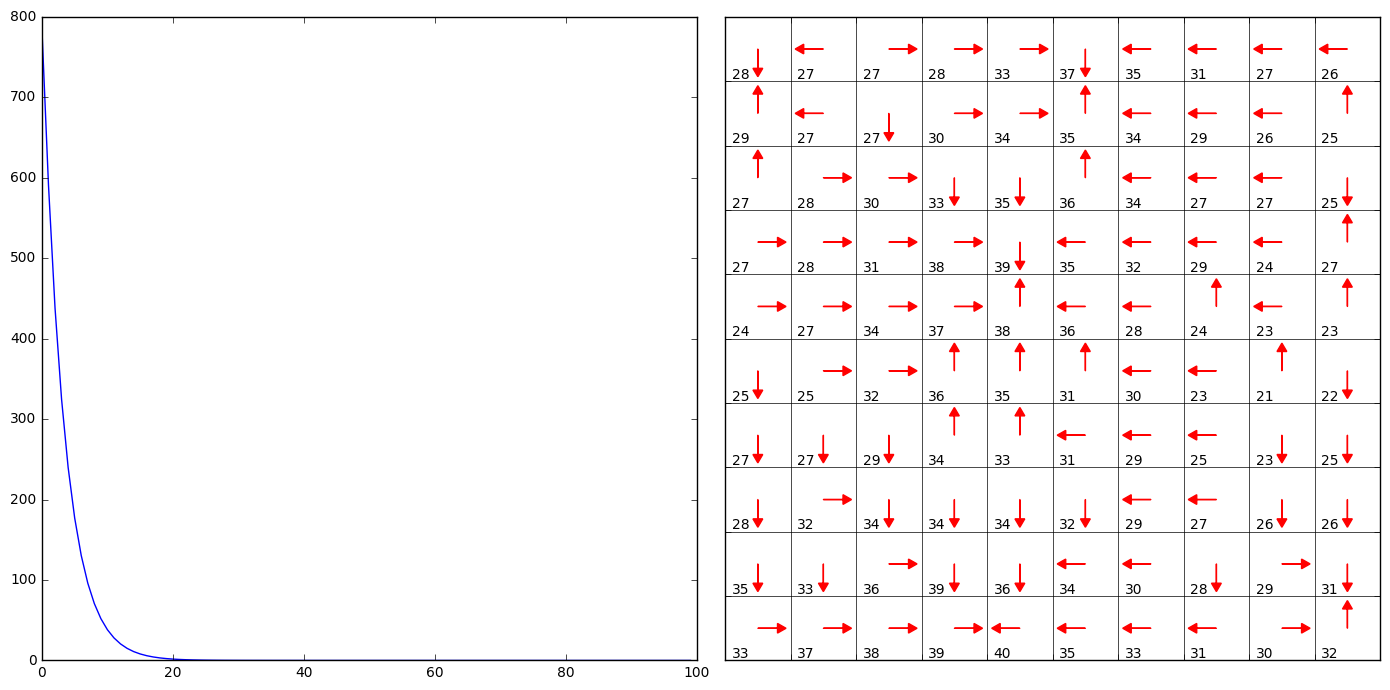

In [47]:
interact(value_iteration1,Itern=(20,160,10),Gamma=(.0,1,.05));

<hr style="height:3px;border:none;color:stillblue;background-color:black;" />

# In comparison to a Markov Chains
### Here, we learn how to move in the underlying transition matrix, while we modify the transition probabilities

![](Images/Deep_Mind_RL1-300x173.jpg)![](Images/Markov_Decision_Process_example-300x240.png)
[image source](http://neuro.cs.ut.ee/demystifying-deep-reinforcement-learning/)

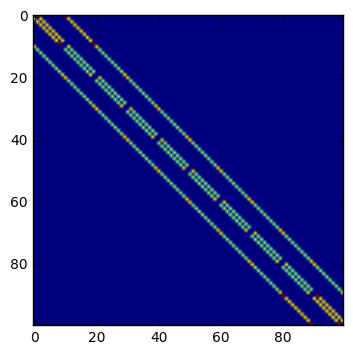

In [48]:
# Graph of connectivity
plt.imshow(Action)

# So far Value Iteration was similar to Dynamic Programming 
# This is called "MODEL BASED RL"
## Which is based on:
* **Deterministic state transition**
* **Limited State Space**
* **Limited Action Space**
* **Deterministic Reward**

<hr style="height:3px;border:none;color:stillblue;background-color:black;" />
# In other words, so far we had no learning by experiments. 
<hr style="height:3px;border:none;color:stillblue;background-color:black;" />


# Known limits of these approach
- **State Space Explosion**
- **Action Space Eplosion**
- **Continuous Spaces**
- **Unknown Behavior or the environment (e.g. imagine after every move, we don't know the exact reward!)**



# However, in most of RL applications we need different approaches to learn value and policy Functions via interactions
* **Temporal Difference Learning (TD-Learning)**
    * **Q-Learning**
    * **Actor-Critic Learning**

# Q-Learning 
## We would like to learn Q values of state-action pairs as follows:


# $$Q(s,a) = r +  \gamma (max(Q(s',a')))$$

# We do thin by playing the game and sampling!







# Several games with Open AI: https://gym.openai.com/
## Example [from](https://medium.com/emergent-future/simple-reinforcement-learning-with-tensorflow-part-0-q-learning-with-tables-and-neural-networks-d195264329d0)

In [53]:
## Load the environment
import gym
env = gym.make('FrozenLake-v0')

[2017-05-09 12:44:09,573] Making new env: FrozenLake-v0


In [54]:
env.action_space.sample()

0

## Implement Q-Table learning algorithm


In [70]:
#Initialize table with all zeros
Q = np.zeros([env.observation_space.n,env.action_space.n])
# Set learning parameters
lr = .85
y = .99
num_episodes = 2000
#create lists to contain total rewards and steps per episode
#jList = []
rList = []
for i in range(num_episodes):
    #Reset environment and get first new observation
    s = env.reset()
    rAll = 0
    d = False
    j = 0
    #The Q-Table learning algorithm
    while j < 99:
        j+=1
        #Choose an action by greedily (with noise) picking from Q table
        a = np.argmax(Q[s,:] + np.random.randn(1,env.action_space.n)*(1./(i+1)))
        #Get new state and reward from environment
        s1,r,d,_ = env.step(a)
        #Update Q-Table with new knowledge
        Q[s,a] = Q[s,a] + lr*(r + y*np.max(Q[s1,:]) - Q[s,a])
        rAll += r
        s = s1
        if d == True:
            break
    #jList.append(j)
    rList.append(rAll)

In [71]:
s = env.reset()
a = np.argmax(Q[s,:] + np.random.randn(1,env.action_space.n)*(1./(i+1)))
env.step(a)

(0, 0.0, False, {'prob': 0.3333333333333333})

In [72]:
print "Score over time: " +  str(sum(rList)/num_episodes)

Score over time: 0.3775


In [58]:
print "Final Q-Table Values"
print Q

Final Q-Table Values
[[  2.41812747e-01   1.34668144e-02   1.37759130e-02   1.34745022e-02]
 [  0.00000000e+00   1.54653562e-02   7.79397923e-05   3.28061161e-01]
 [  2.95354171e-03   1.44168576e-02   3.38725506e-03   4.90887652e-01]
 [  1.51910228e-03   1.80457987e-02   2.23516011e-03   3.57746406e-01]
 [  2.50271470e-01   6.24764384e-04   0.00000000e+00   3.11052109e-04]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00]
 [  6.24345458e-01   5.55418788e-09   1.72631494e-04   1.42910829e-04]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00]
 [  1.64678842e-03   5.16343436e-05   2.41407774e-03   5.49872600e-01]
 [  0.00000000e+00   8.43591681e-01   0.00000000e+00   0.00000000e+00]
 [  6.12664778e-01   0.00000000e+00   0.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   0.00000000e+00   8.25771751e-01   0

## Excercise: Learn Q-tables for Grid World example above


<hr style="height:3px;border:none;color:stillblue;background-color:black;" />

# Function Approximation for Q-values
### Q-Tables are not scalable
### So, what if we mixture learning of Q-values by supervised learning methods
<hr style="height:3px;border:none;color:stillblue;background-color:black;" />

# Deep Q-Networks
### The right one, empirically works better
![](Images/dqn.png)


# [Deep Mind paper](https://www.nature.com/nature/journal/v518/n7540/full/nature14236.html)
![](Images/atari.png)


[A nice and simple tutorial](http://karpathy.github.io/2016/05/31/rl/)

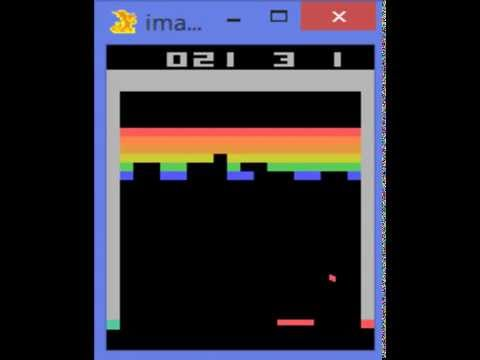

In [26]:
from IPython.display import YouTubeVideo
YouTubeVideo('V1eYniJ0Rnk',width=700, height=600)

# One important note!
Comparing to classical computational modeling here we learn, but we don't say how. 
We don't hardcode the logics and strategies, we learn them

<hr style="height:3px;border:none;color:stillblue;background-color:black;" />

# Conclusions

# RL in relation to Game theory and the notion of Planning and optimization
- Game theory and RL as Dynamic Game Playing
- Game theory is based on assumption of rational strategies and actions and min-max optimization
- Planning Vs. Learning
<hr style="height:3px;border:none;color:stillblue;background-color:black;" />

# End of Model based Planning and Optimization!
- **This can be a general statement in many fields**
- ** We can think about it in terms of Black Swan too**


<hr style="height:3px;border:none;color:stillblue;background-color:black;" />

# One answer is learning with interaction
- **We can think about it in relation to the success of social media, Google, ...**
- ** We can think about it in relation to software architecture: MS. Windows vs. Android**
<hr style="height:3px;border:none;color:stillblue;background-color:black;" />



# But why only games? 
## Definitely, not because games are just cool!
## One possible answer: Only via games we can experience the interactions faster than the reality. So, there is no problem with data collection!

# Question: Can we use RL in other domains such as 
- Banks and economic polocies
- Supply chain and Inventory management (VMI)

- Dynamic Resource Allocation
    - CPU
    - Clouds
    - Manufacturing: Job-Shop Scheduling
    - **Smart Home**
    - Urban Traffic planning: Dynamic Tolls, Dynamic Light control
    
- Simulation Based Optimization
    - Water flow 
